# Необходимые зависимости

In [43]:
%pip install pm4py

Note: you may need to restart the kernel to use updated packages.


# Необходимые импорты

In [44]:
import pandas as pd
import pm4py
from pm4py.objects.log.util import dataframe_utils
import networkx as nx
import matplotlib.pyplot as plt
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_vis_factory

# 2 задание. Граф действий пользователя. 

In [45]:
pData = pd.read_csv("../data/core.csv", sep=' - ', header=None) 
df = pd.DataFrame({'Time':pData[1],'Event':pData[3]})
df.head()

/tmp/ipykernel_88660/587984304.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pData = pd.read_csv("../data/core.csv", sep=' - ', header=None)


,Time,Event
0,2023-10-02 20:31:59,Server up
1,2023-10-02 20:31:59,Start server initialization
2,2023-10-02 20:31:59,Configuring environment
3,2023-10-02 20:31:59,Environment configured successfully
4,2023-10-02 20:31:59,Bot starts to listen


In [46]:
def transform_data(data_frame_to_transform):
    data_frame_to_transform['EventIndex'] = data_frame_to_transform.groupby('Event').cumcount() + 1
    data_frame_to_transform = dataframe_utils.convert_timestamp_columns_in_df(data_frame_to_transform)
    data_frame_to_transform = data_frame_to_transform.sort_values('Time')
    data_frame_to_transform['EventIndex'] = data_frame_to_transform['EventIndex'].astype(str)
    data_frame_to_transform['Event'] = data_frame_to_transform['Event'].astype(str)
    data_frame_to_transform = data_frame_to_transform.rename(
        columns={
            'EventIndex':'case:concept:name'
        }
    )
    data_frame_to_transform = data_frame_to_transform.rename(columns={'Event': 'concept:name'})
    data_frame_to_transform = data_frame_to_transform.rename(columns={'Time': 'time:timestamp'})
    return data_frame_to_transform

def pm4py_graph(data_frame_for_graph, filename ="logging_graph.png"):
    event_log = pm4py.convert_to_event_log(data_frame_for_graph)
    heu_net = heuristics_miner.apply_heu(event_log)
    gviz = hn_vis_factory.apply(heu_net)
    hn_vis_factory.view(gviz)
    hn_vis_factory.save(gviz, filename)
    

/home/nikita/anaconda3/envs/vk_api_bot_ml/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/nikita/anaconda3/envs/vk_api_bot_ml/lib/python3.11/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


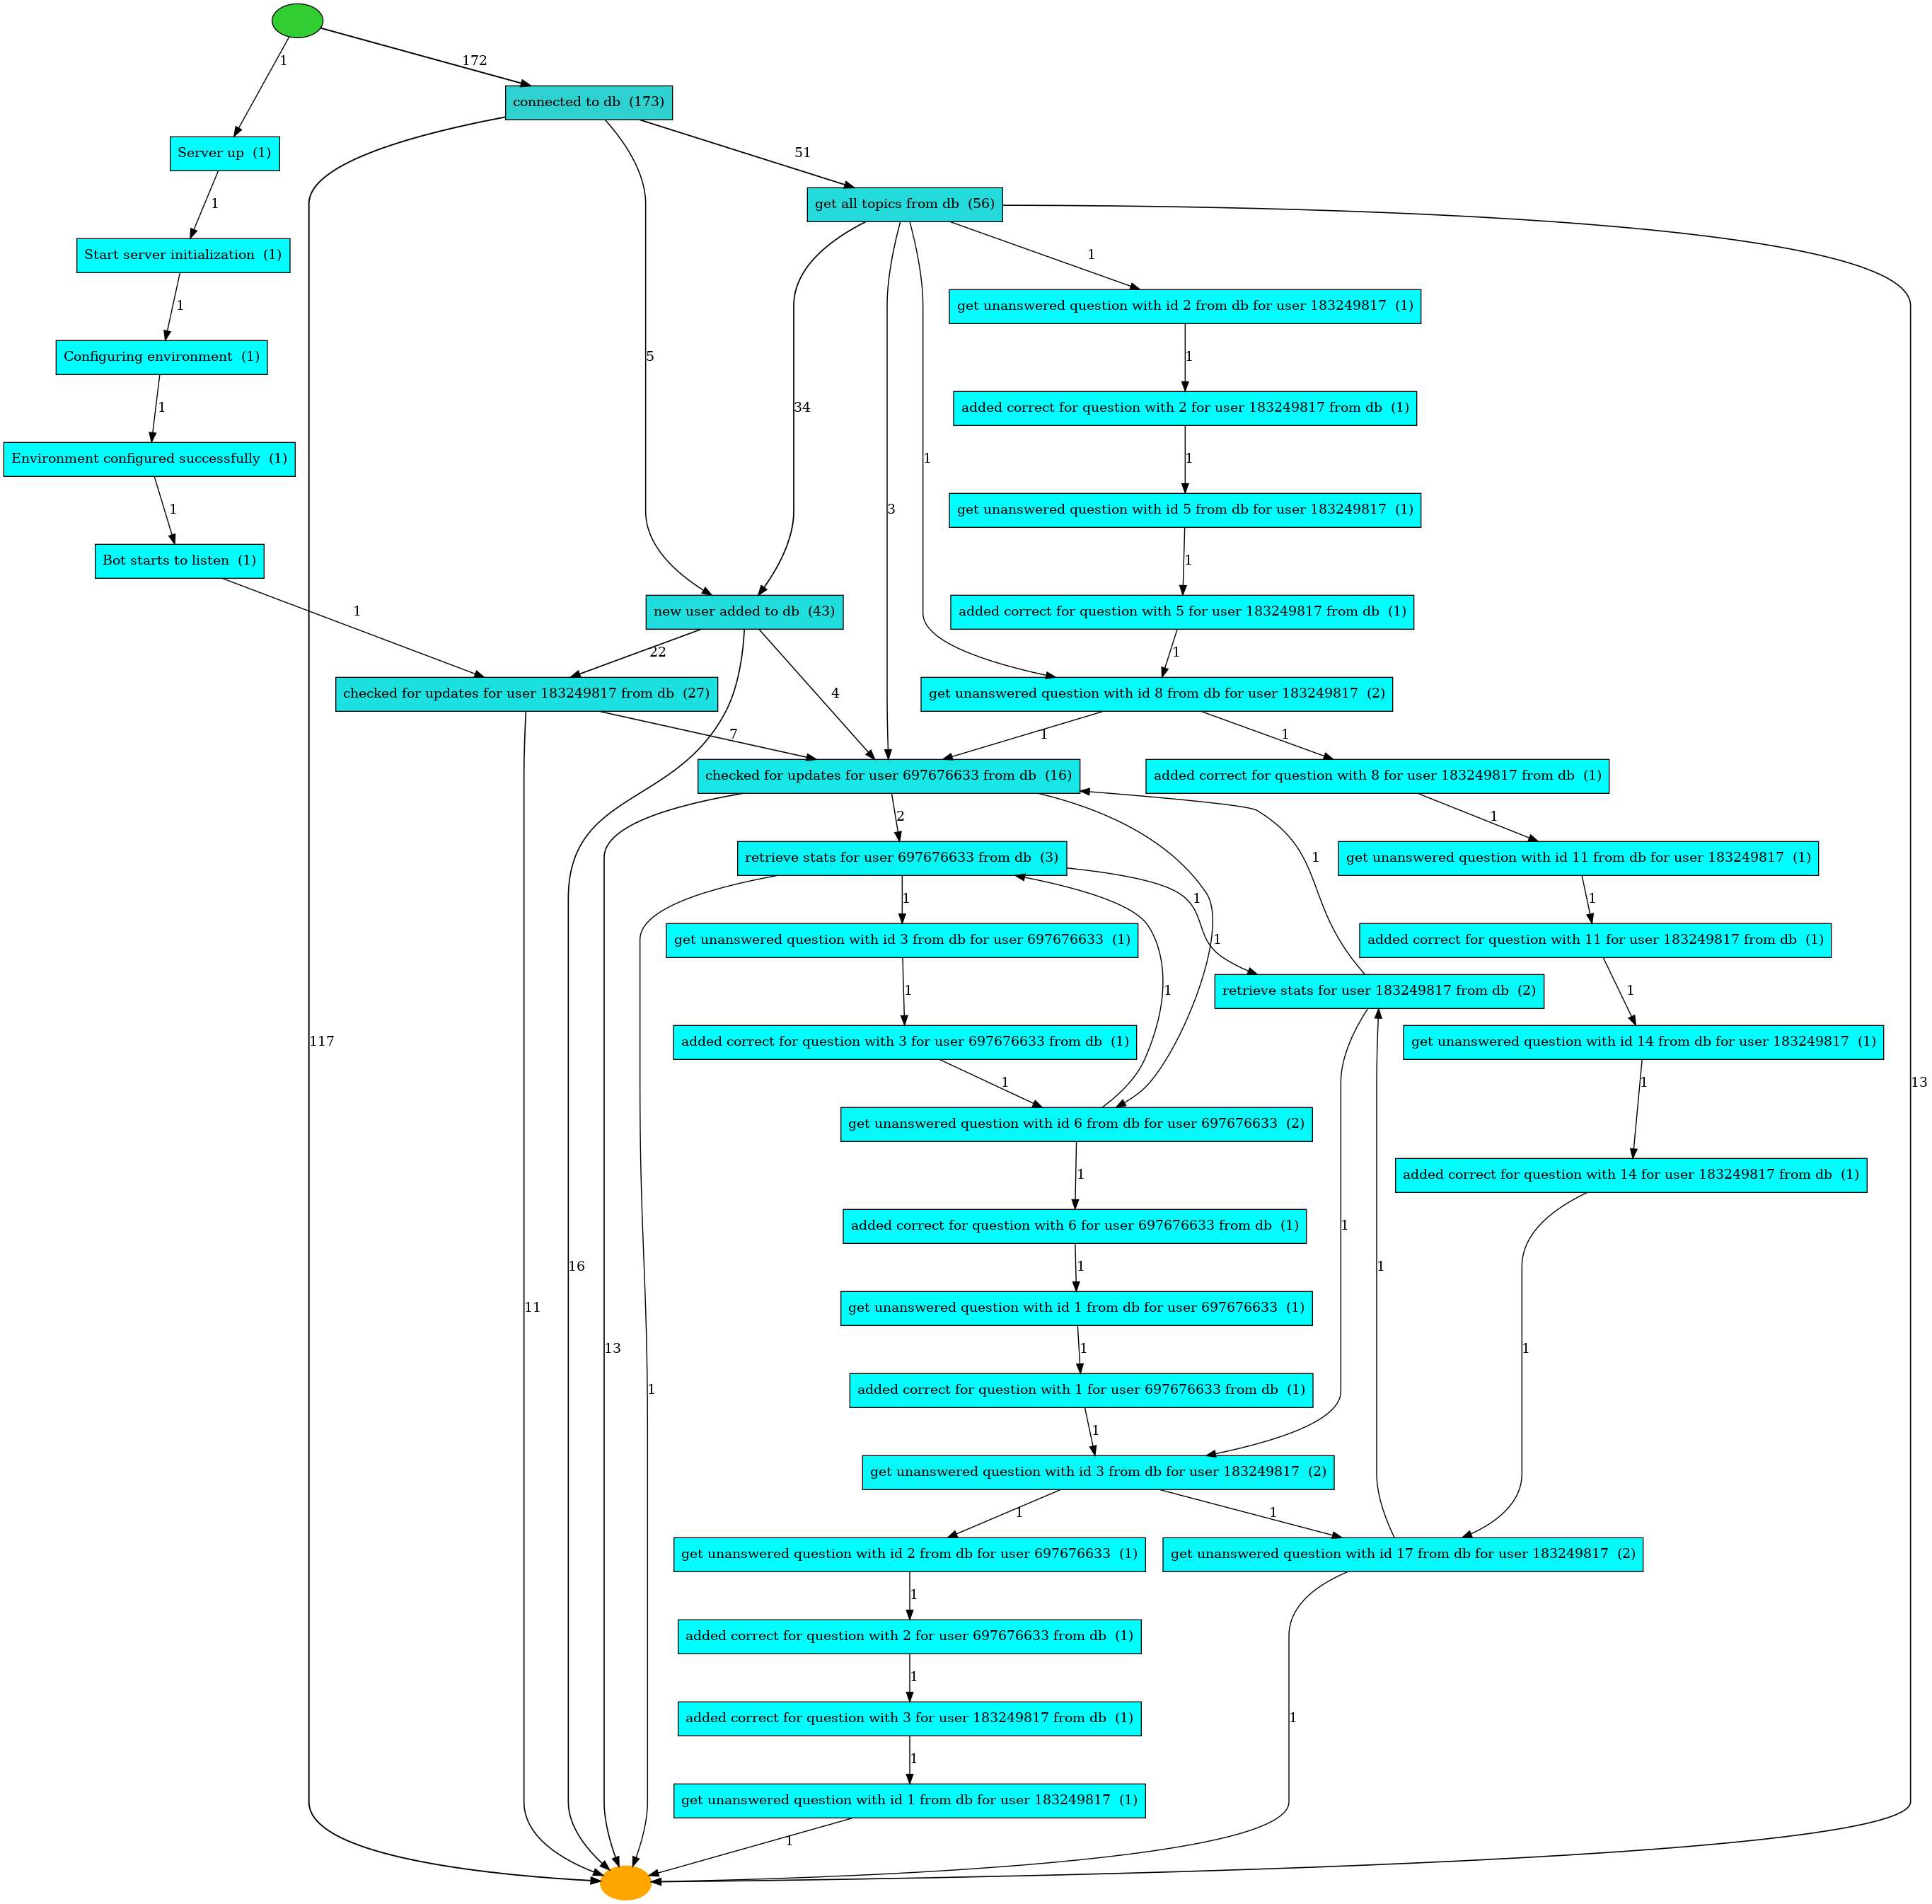

In [47]:
df_transformed = transform_data(df)
pm4py_graph(df_transformed)

### Из графа видно, что пользователь ведёт себя в соответствии с порядком действий, предусмотренным циклом действий пользователя" в процессе разработки.

### Качественно улучшить UE можно добавив возможность повторного ответа на вопрос без повторного вызова тематики.

# 3 задание. Построить граф действий пользователя, в котором присутствуют ошибки уровня "Error" и "CRITICAL".  

In [48]:
df_error = pd.read_csv('../data/core_with_errors_behaviour.csv', sep=' - ', header=None) 
df_error_ = pd.DataFrame({'Time':df_error[1],'Event':df_error[3]})

/tmp/ipykernel_88660/4184642769.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_error = pd.read_csv('../data/core_with_errors_behaviour.csv', sep=' - ', header=None)


In [49]:
df_error

,0,1,2,3,4,5
0,CRITICAL,2023-10-02 20:31:59,85521,Server up,__main__,11
1,INFO,2023-10-02 20:31:59,85521,Start server initialization,__main__,13
2,INFO,2023-10-02 20:31:59,85521,Configuring environment,__main__,17
3,INFO,2023-10-02 20:31:59,85521,Environment configured successfully,__main__,19
4,INFO,2023-10-02 20:31:59,85521,Bot starts to listen,__main__,20
...,...,...,...,...,...,...
407,INFO,2023-10-02 21:20:42,91611,connected to db,core.DataBase.DataBase,13
408,ERROR,2023-10-02 21:20:42,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
409,WARNING,2023-10-02 21:20:42,91611,change path to absolute for db connection,core.DataBase.DataBase,17
410,INFO,2023-10-02 21:20:42,91611,added correct for question with 4 for user 697...,core.DataBase.DataBase,86


In [50]:
errors_only_df = df_error[df_error.iloc[:,0] == "ERROR"]
errors_only_df

,0,1,2,3,4,5
364,ERROR,2023-10-02 21:20:14,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
368,ERROR,2023-10-02 21:20:14,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
372,ERROR,2023-10-02 21:20:14,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
376,ERROR,2023-10-02 21:20:35,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
380,ERROR,2023-10-02 21:20:35,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
384,ERROR,2023-10-02 21:20:35,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
388,ERROR,2023-10-02 21:20:35,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
392,ERROR,2023-10-02 21:20:41,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
396,ERROR,2023-10-02 21:20:41,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16
400,ERROR,2023-10-02 21:20:41,91611,failed to find relative path to sqlite db,core.DataBase.DataBase,16


In [51]:
critical_only_df = df_error[df_error.iloc[:,0] == "CRITICAL"]
critical_only_df

,0,1,2,3,4,5
0,CRITICAL,2023-10-02 20:31:59,85521,Server up,__main__,11
351,CRITICAL,2023-10-02 21:01:45,85521,Server down,__main__,23
352,CRITICAL,2023-10-02 21:01:49,90560,Server up,__main__,11
357,CRITICAL,2023-10-02 21:12:57,90560,Server down,__main__,23
358,CRITICAL,2023-10-02 21:20:05,91611,Server up,__main__,11
411,CRITICAL,2023-10-02 21:20:52,91611,Server down,__main__,23


/home/nikita/anaconda3/envs/vk_api_bot_ml/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/nikita/anaconda3/envs/vk_api_bot_ml/lib/python3.11/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


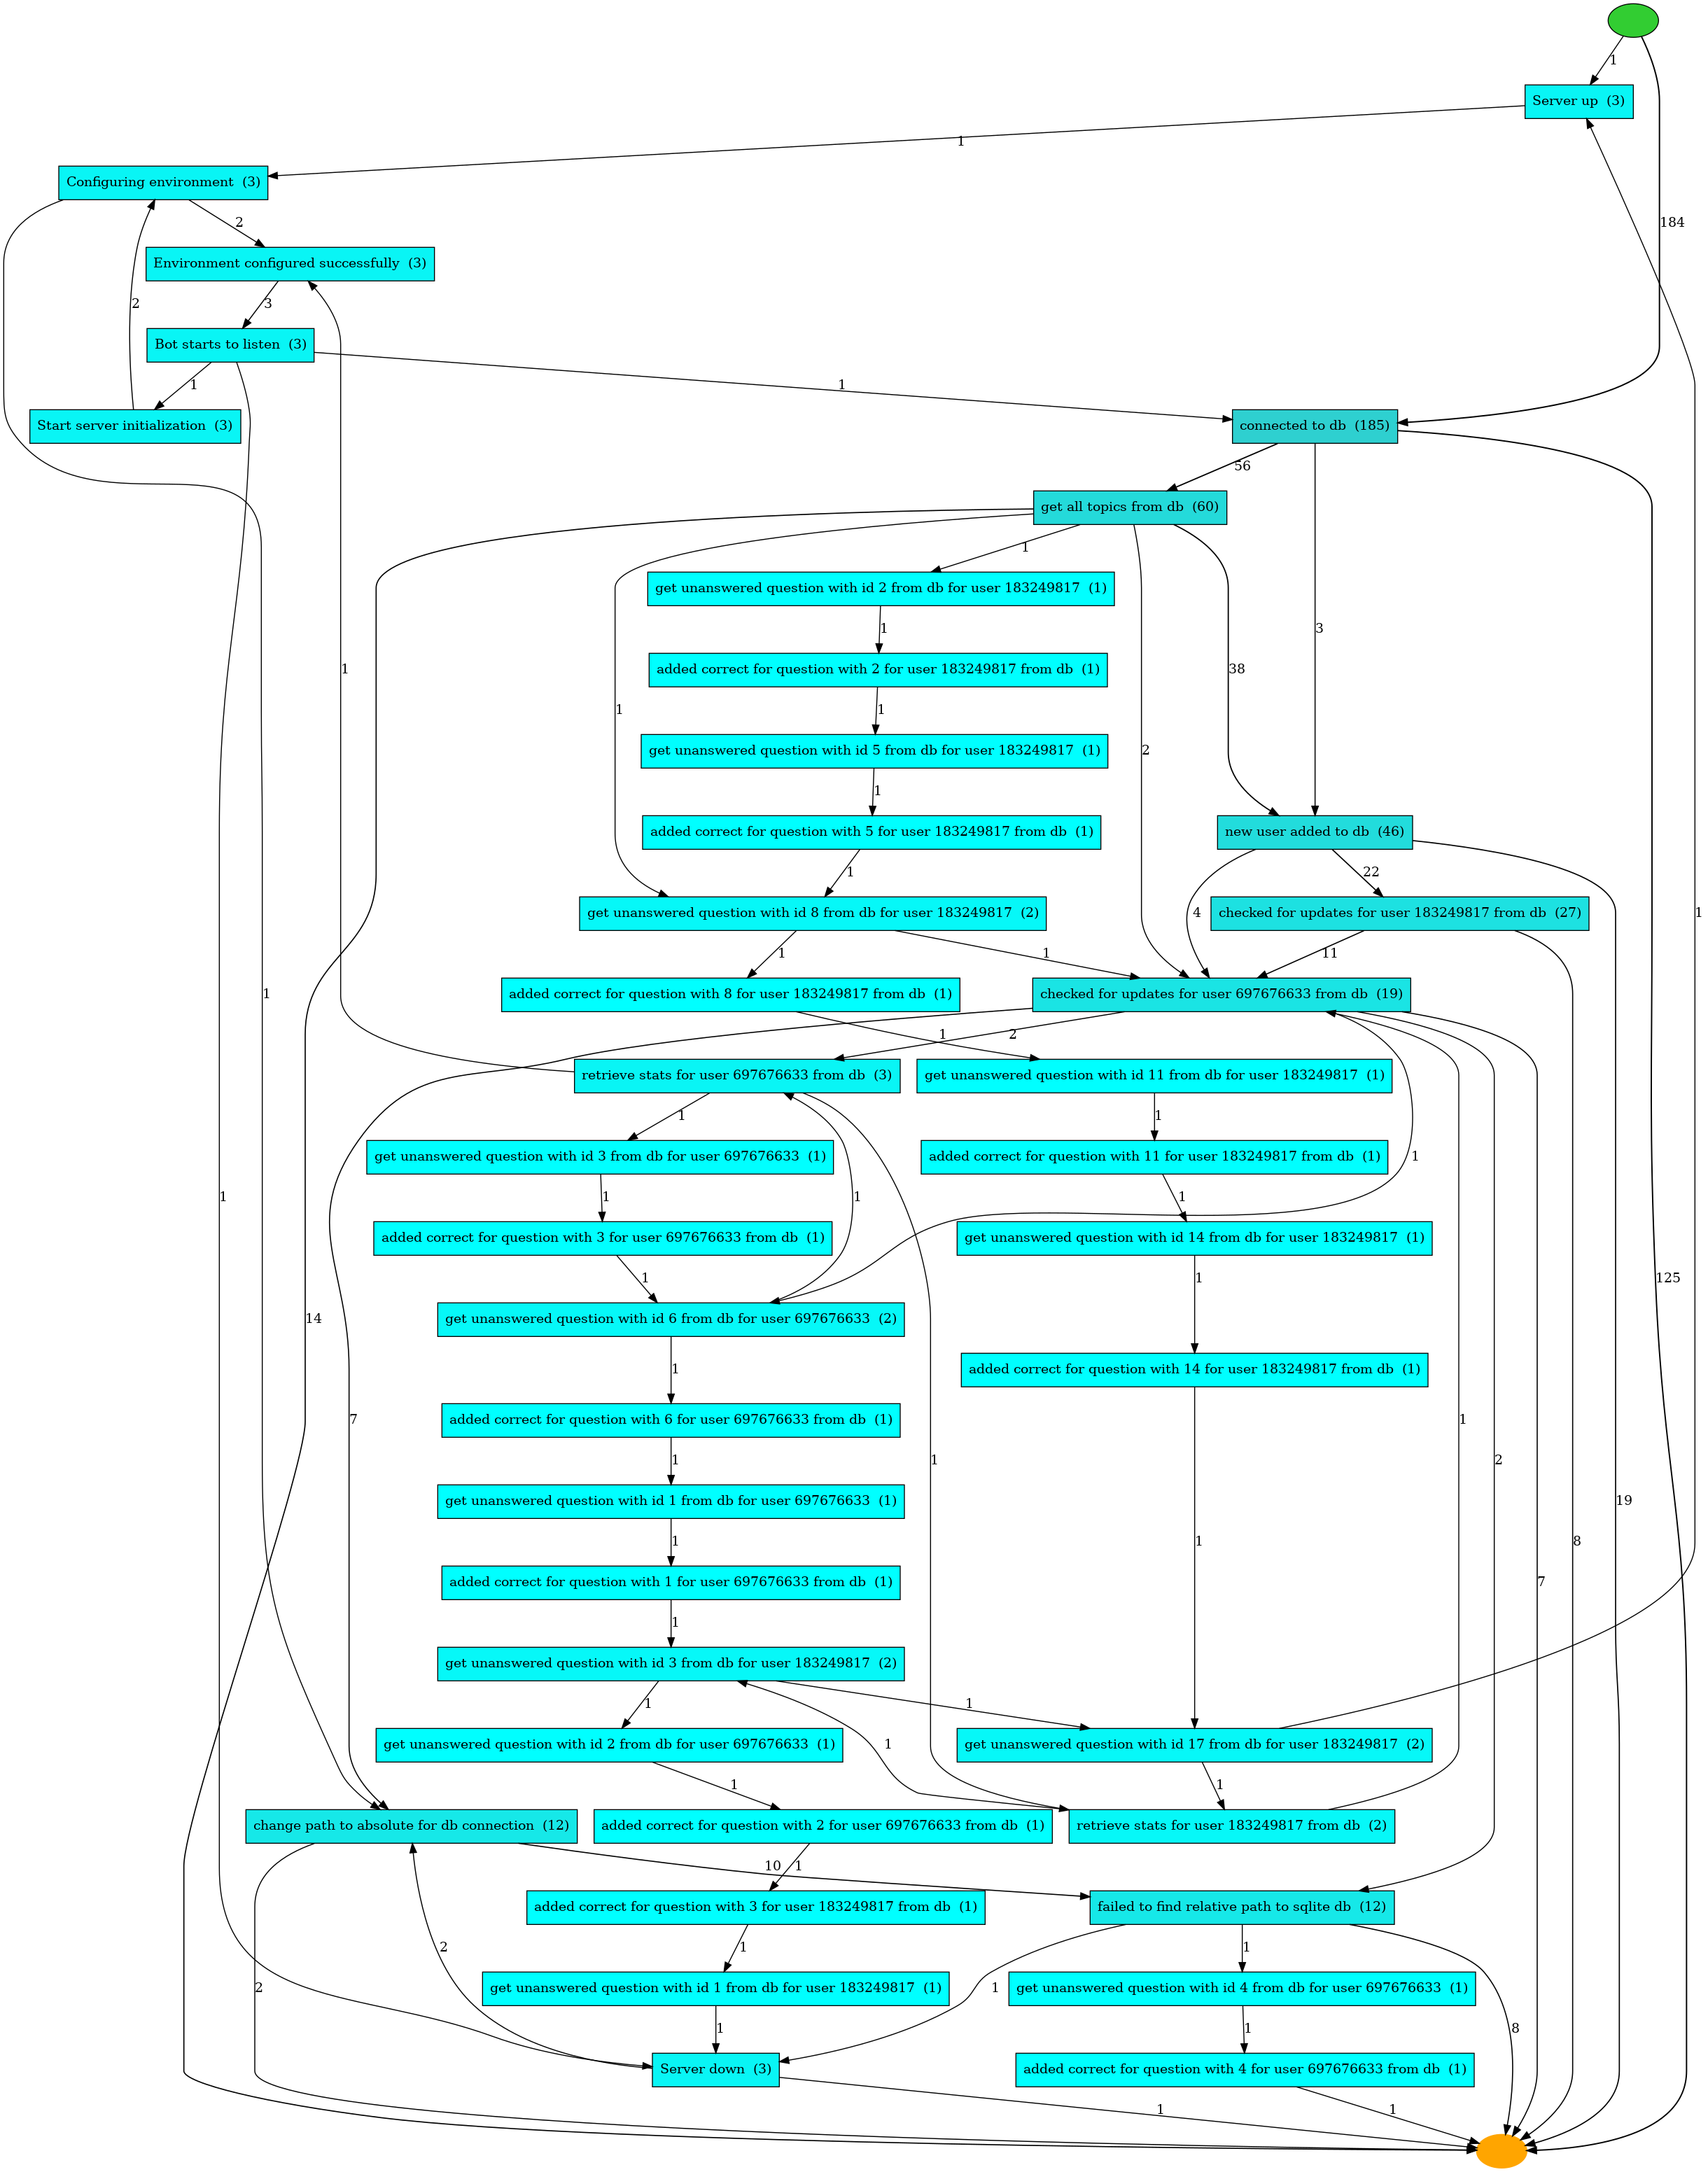

In [52]:
df_error_transformed = transform_data(df_error_)
pm4py_graph(df_error_transformed)

### CRITICAL - начало работы сервера с ботом и его выключение. ERRORS - связаны с работой бд, проблемы с подключением к которой были эмитированы.

# 4 задание. Найти самый длинный путь пользователя. Построить, вывести, проанализировать. 

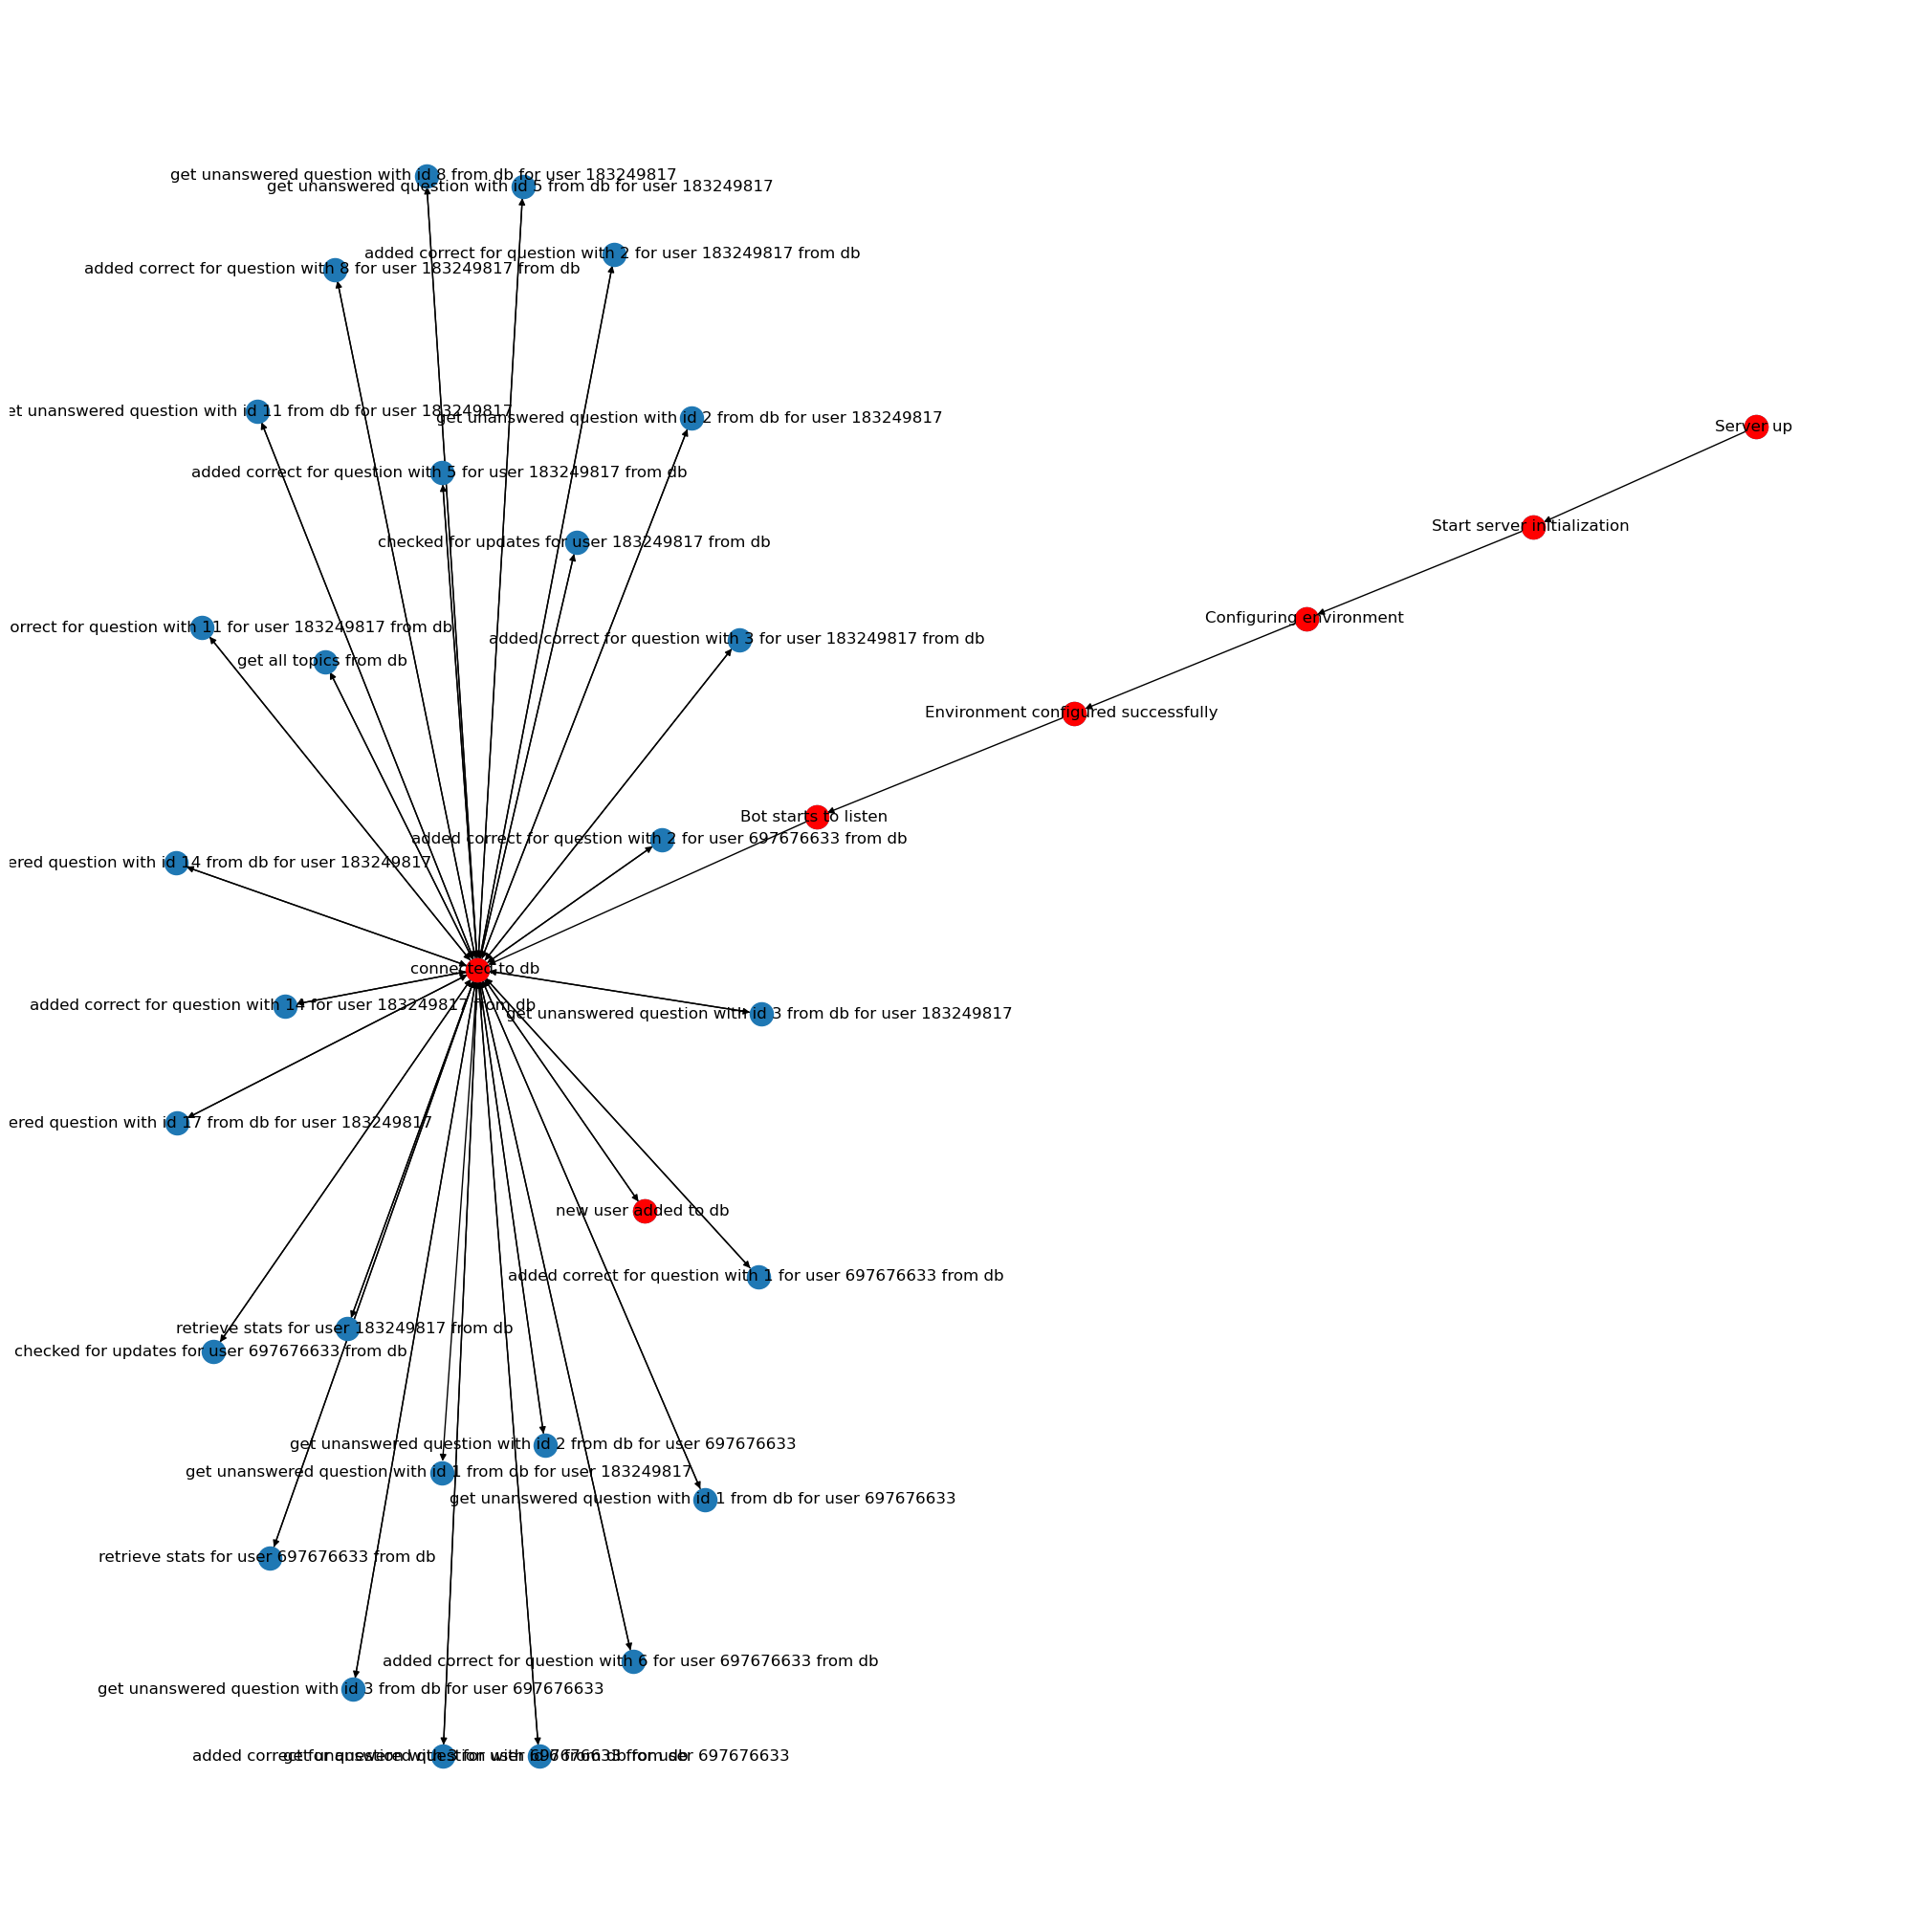

In [53]:
G = nx.DiGraph()
for i in range(len(df)-1):
    G.add_edge(df['Event'][i], df['Event'][i+1])

def dfs(nx_graph, node, visited_nodes, path, max_path, max_length):
    visited_nodes[node] = True
    path.append(node)

    if len(path) > max_length[0]:
        max_path[0] = list(path)
        max_length[0] = len(path)

    for neighbour in nx_graph.neighbors(node):
        if not visited_nodes[neighbour]:
            dfs(nx_graph, neighbour, visited_nodes, path, max_path, max_length)

    path.pop()
    visited_nodes[node] = False


visited = {node: False for node in G.nodes()}
path = []
max_path = [None]
max_length = [-1]


for node in G.nodes():
    dfs(G, node, visited, path, max_path, max_length)


plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=max_path[0], node_color='r')
plt.show()

### Aнализ:
#### Так как действия бота завязаны вокруг обращений к бд, логично, что все действия с начала инициализации сервера завязаны на это действия этого объекта. Максимальная глубина не велика, так как, опять же, база данных играет центральную роль, а функционал скорее "горизонтальный" в плане архитектуры, т.е. после первичной инициализации действия пользователя узко ограничиваются.